In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import coffea.util as util
import os, sys
import pandas as pd
import hist
import mplhep as hep
from pathlib import Path
sys.path.append("../../analysisTools/")
import utils
import plotTools as pt
hep.style.use("CMS")
plt.rcParams['font.size'] = 18.0
import json

In [2]:
plots = util.load("plots_postSkim_Nov24.coffea")[0]
dfs = utils.get_signal_point_dict(plots)

print("Cuts")
cuts = utils.get_signal_list_of_cuts(plots,get_cut_idx=True)
print("Histos")
print(list(plots.keys()))

Cuts
Histos
['gen_met', 'cutDesc', 'cutflow', 'cutflow_cts', 'cutflow_nevts', 'cutflow_nevts_norm', 'cutflow_vtx_matched']


In [34]:
csv = pd.read_csv('input.csv')
csv['mchi'] = csv['dataset'].apply(lambda x: float(x.split("_")[2].split("-")[1].replace("p",".")))
csv['dmchi'] = csv['dataset'].apply(lambda x: float(x.split("_")[3].split("-")[1].replace("p",".")))
csv['ctau'] = csv['dataset'].apply(lambda x: float(x.split("_")[4].split("-")[1].replace("p",".")))
csv['m1'] = csv.mchi - csv.dmchi/2
csv['m2'] = csv.mchi + csv.dmchi/2
csv['delta'] = csv.dmchi/csv.m1

total needed =  15809860.762570836


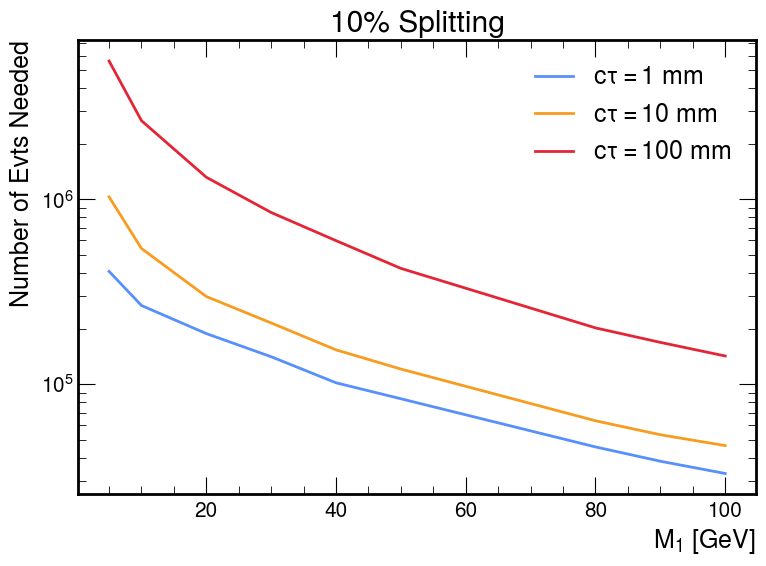

In [41]:
plt.figure(figsize=(8,6))

delta = 0.1
dfsel = dfs[dfs.delta==delta]
n_total = 0
for i,ct in enumerate([1,10,100]):
    m1s = sorted(list(set(dfsel[dfsel.ctau==ct].m1)))
    needed = []
    asked = []
    for m1 in m1s:
        name = dfsel[(dfsel.ctau==ct)&(dfsel.m1==m1)].name.item()
        nevts = plots['cutflow_nevts'][name]['cut5']
        eff = plots['cutflow_nevts_norm'][name]['cut5']
        n_needed = 1000/eff
        needed.append(n_needed)
        asked.append(csv[(csv.delta==delta)&(csv.m1==m1)&(csv.ctau==ct)].events.item())
    plt.plot(m1s,needed,color=f"C{i}",lw=2,label=f"$c\\tau = {ct}$ mm")
    n_total += np.sum(needed)
    #plt.plot(m1s,asked,color=f"C{i}",lw=2,linestyle='--')
plt.legend(loc='upper right',fontsize=18)
plt.title(f"{int(100*delta)}% Splitting")
plt.yscale('log')
plt.xlabel("$M_1$ [GeV]",fontsize=18)
plt.ylabel("Number of Evts Needed",fontsize=18)
plt.tight_layout()
plt.savefig(f"nEvts_needed_delta{int(100*delta)}.pdf")
print("total needed = ",n_total)

total needed =  6992763.8325671945


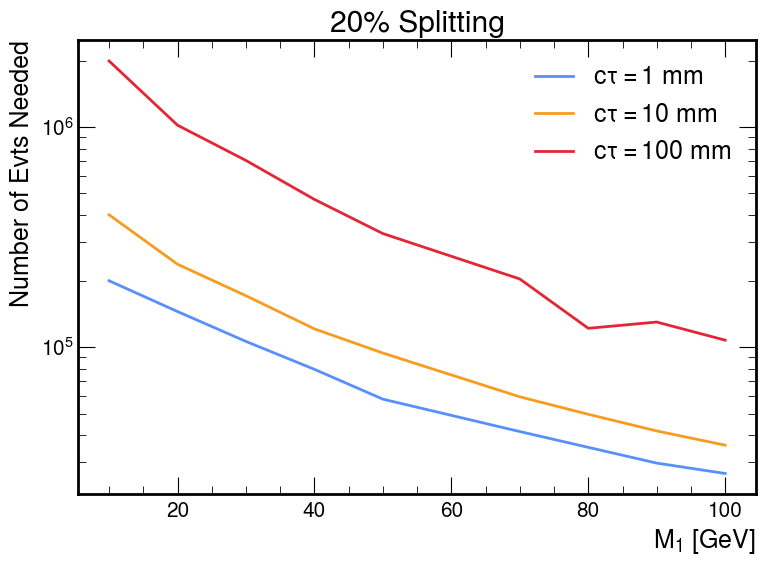

In [42]:
plt.figure(figsize=(8,6))

delta = 0.2
dfsel = dfs[dfs.delta==delta]
n_total = 0
for i,ct in enumerate([1,10,100]):
    m1s = sorted(list(set(dfsel[dfsel.ctau==ct].m1)))
    needed = []
    asked = []
    for m1 in m1s:
        name = dfsel[(dfsel.ctau==ct)&(dfsel.m1==m1)].name.item()
        nevts = plots['cutflow_nevts'][name]['cut5']
        eff = plots['cutflow_nevts_norm'][name]['cut5']
        n_needed = 1000/eff
        needed.append(n_needed)
        asked.append(csv[(csv.delta==delta)&(csv.m1==m1)&(csv.ctau==ct)].events.item())
    plt.plot(m1s,needed,color=f"C{i}",lw=2,label=f"$c\\tau = {ct}$ mm")
    n_total += np.sum(needed)
    #plt.plot(m1s,asked,color=f"C{i}",lw=2,linestyle='--')
plt.legend(loc='upper right',fontsize=18)
plt.title(f"{int(100*delta)}% Splitting")
plt.yscale('log')
plt.xlabel("$M_1$ [GeV]",fontsize=18)
plt.ylabel("Number of Evts Needed",fontsize=18)
plt.tight_layout()
plt.savefig(f"nEvts_needed_delta{int(100*delta)}.pdf")
print("total needed = ",n_total)

In [43]:
6992764 + 15809861

22802625